** COVID_19 IMPACT ON GlOBAL ECONOMY**

Importing necessary Python libraries and the dataset:

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
data = pd.read_csv("https://raw.githubusercontent.com/Nasirkhan-1/Impact_of_covid_19_on_global_economy/refs/heads/main/transformed_data.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/Nasirkhan-1/Impact_of_covid_19_on_global_economy/refs/heads/main/raw_data.csv")
print(data)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


**The data we are using contains the data on covid-19 cases and their impact on GDP from December 31, 2019, to October 10, 2020.**

**DATA PREPARATION**

Data Preparation
The dataset that we are using here contains two data files. One file contains raw data, and the other file contains transformed one. But we have to use both datasets for this task, as both of them contain equally important information in different columns. So let’s have a look at both the datasets one by one:

In [4]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [5]:
print(data2.head())

  iso_code     location        date  total_cases  total_deaths  \
0      AFG  Afghanistan  2019-12-31          0.0           0.0   
1      AFG  Afghanistan  2020-01-01          0.0           0.0   
2      AFG  Afghanistan  2020-01-02          0.0           0.0   
3      AFG  Afghanistan  2020-01-03          0.0           0.0   
4      AFG  Afghanistan  2020-01-04          0.0           0.0   

   stringency_index  population  gdp_per_capita  human_development_index  \
0               0.0    38928341        1803.987                    0.498   
1               0.0    38928341        1803.987                    0.498   
2               0.0    38928341        1803.987                    0.498   
3               0.0    38928341        1803.987                    0.498   
4               0.0    38928341        1803.987                    0.498   

  Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  Unnamed: 13  
0      #NUM!       #NUM!       #NUM!    17.477233  7.497754494  
1      #NUM!    

After having initial impressions of both datasets, I found that we have to combine both datasets by creating a new dataset. But before we create a new dataset, let’s have a look at how many samples of each country are present in the dataset:

In [6]:
data['COUNTRY'].value_counts()

,count
COUNTRY,
Afghanistan,294
Indonesia,294
Macedonia,294
Luxembourg,294
Lithuania,294
...,...
Tajikistan,172
Comoros,171
Lesotho,158


So, we dont have an equal number of sample country in the dataset. let's have a look on mode values.

In [7]:
data['COUNTRY'].value_counts().mode()

,count
0,294


So. The MODE IS 294. We will need to use it for dividing the sum of all the samples related to the human development index, GDP per capita, and the population. Now let’s create a new dataset by combining the necessary columns from both the datasets:

In [8]:
code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)),
                               columns = ["Country Code", "Country", "HDI",
                                          "Total Cases", "Total Deaths",
                                          "Stringency Index", "Population"])
print(aggregated_data.head())


  Country Code      Country       HDI  Total Cases  Total Deaths  \
0          AFG  Afghanistan  0.498000    5126433.0      165875.0   
1          ALB      Albania  0.600765    1071951.0       31056.0   
2          DZA      Algeria  0.754000    4893999.0      206429.0   
3          AND      Andorra  0.659551     223576.0        9850.0   
4          AGO       Angola  0.418952     304005.0       11820.0   

   Stringency Index  Population  
0          3.049673   17.477233  
1          3.005624   14.872537  
2          3.195168   17.596309  
3          2.677654   11.254996  
4          2.965560   17.307957  


I have not included the GDP per capita column yet. I didn’t find the correct figures for GDP per capita in the dataset. So it will be better to manually collect the data about the GDP per capita of the countries.

As we have so many countries in this data, it will not be easy to manually collect the data about the GDP per capita of all the countries. So let’s select a subsample from this dataset. To create a subsample from this dataset, I will be selecting the top 10 countries with the highest number of covid-19 cases. It will be a perfect sample to study the economic impacts of covid-19. So let’s sort the data according to the total cases of Covid-19:

In [9]:
# Sorting the data
data = aggregated_data.sort_values(by= ["Total Cases"], ascending= False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


Lets select 10 countries with highest number of covid cases.

In [10]:
data = data.head(10)
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.4

Now i will add 2 more columns. GDP per capita before covid-19, GDP per capita during Covid-19) to this dataset:

# **NOTE :** THE Data About the GDP is Collected manually.

In [11]:
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75,
                            11497.65, 7027.61, 9946.03,
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71,
                            10126.72, 6126.87, 8346.70,
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data)

    Country Code         Country       HDI  Total Cases  Total Deaths  \
200          USA   United States  0.924000  746014098.0    26477574.0   
27           BRA          Brazil  0.759000  425704517.0    14340567.0   
90           IND           India  0.640000  407771615.0     7247327.0   
157          RUS          Russia  0.816000  132888951.0     2131571.0   
150          PER            Peru  0.599490   74882695.0     3020038.0   
125          MEX          Mexico  0.774000   74347548.0     7295850.0   
178          ESP           Spain  0.887969   73717676.0     5510624.0   
175          ZAF    South Africa  0.608653   63027659.0     1357682.0   
42           COL        Colombia  0.581847   60543682.0     1936134.0   
199          GBR  United Kingdom  0.922000   59475032.0     7249573.0   

     Stringency Index  Population  GDP Before Covid  GDP During Covid  
200          3.350949   19.617637          65279.53          63543.58  
27           3.136028   19.174732           8897.49 

**Analyze the Spread of Covid-19**

Now let’s start by analyzing the spread of covid-19 in all the countries with the highest number of covid-19 cases. I will first have a look at all the countries with the highest number of covid-19 cases:

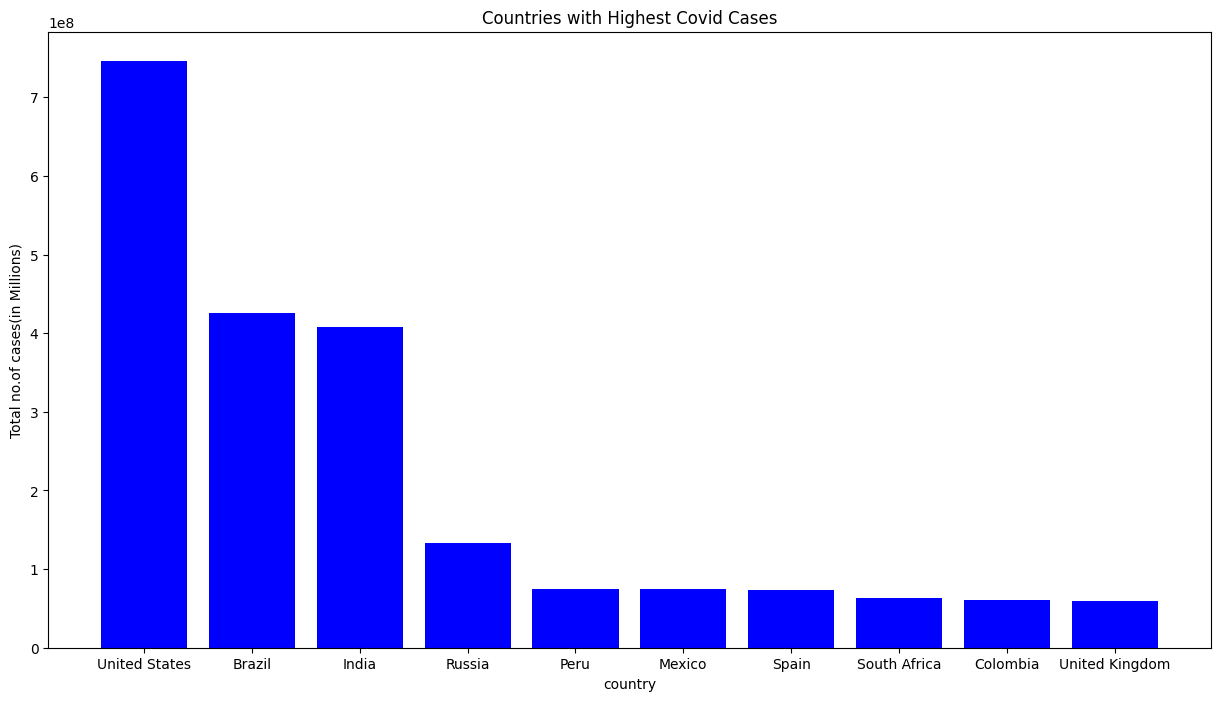

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(15, 8))
x = data["Country"]
y = data["Total Cases"]
plt.xlabel("country")
plt.ylabel("Total no.of cases(in Millions)")
plt.title("Countries with Highest Covid Cases")
plt.bar(x,y,color='Blue')
plt.show()

We can see that the USA is comparatively having a very high number of covid-19 cases as compared to Brazil and India in the second and third positions.
**Now let’s have a look at the total number of deaths among the countries with the highest number of covid-19 cases:**

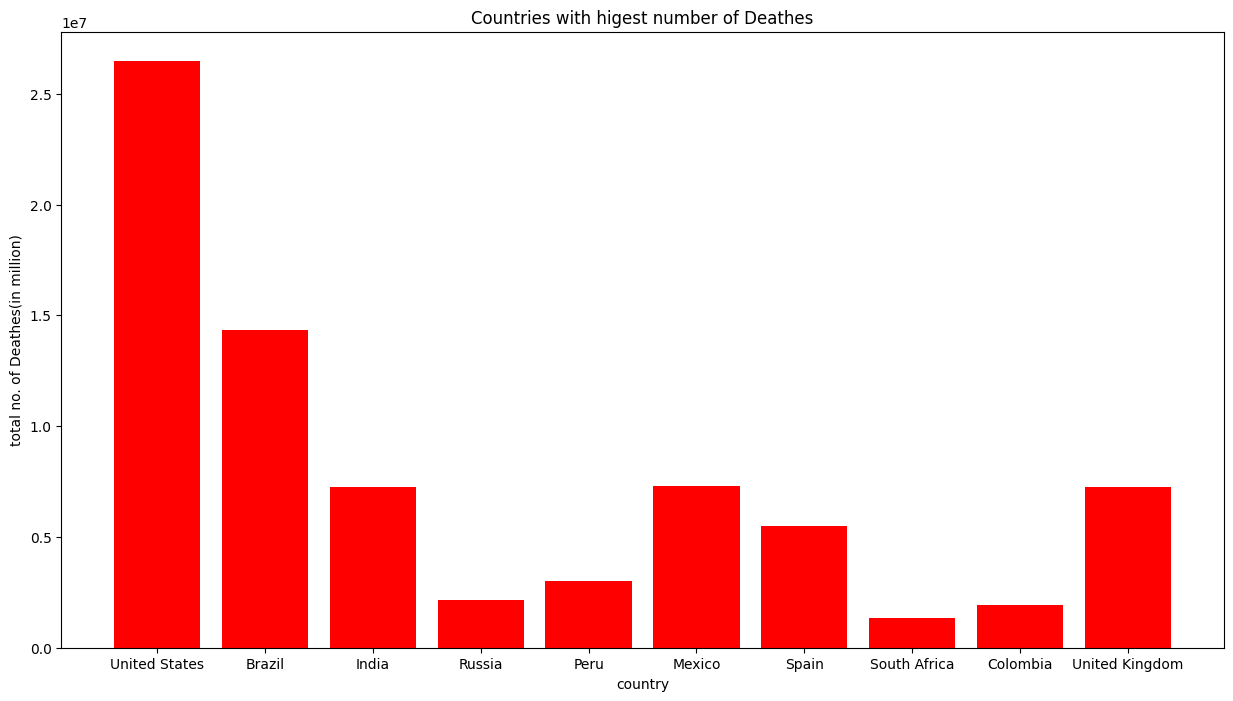

In [13]:
fig = plt.figure(figsize=(15,8))
x = data['Country'].head(10)
y = data['Total Deaths'].head(10)
plt.xlabel("country"),plt.ylabel("total no. of Deathes(in million)")
plt.title("Countries with higest number of Deathes")
plt.bar(x,y,color='red')
plt.show()

Just like the total number of covid-19 cases, the USA is leading in the deaths
**Now let’s compare the total number of cases and total deaths in all these countries**

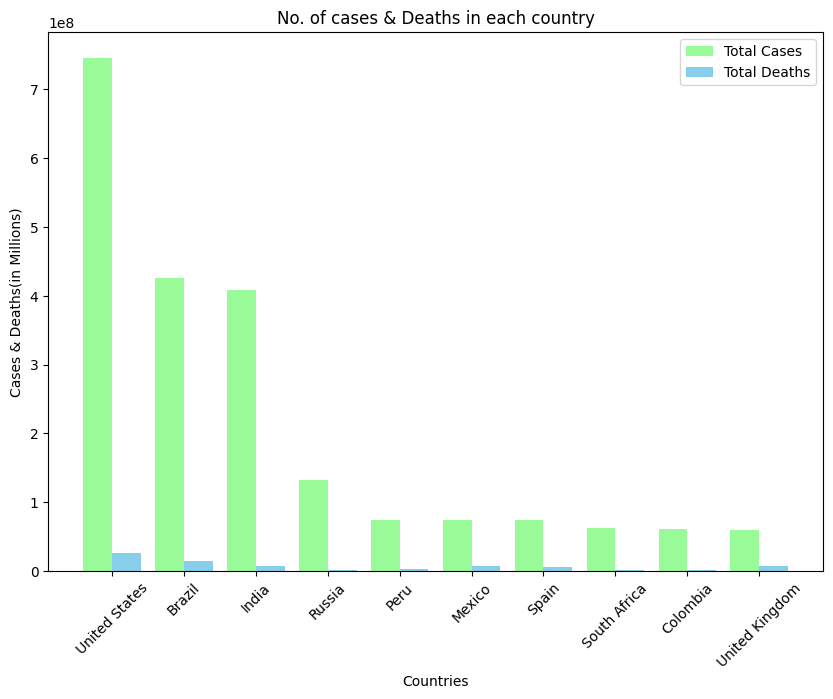

In [14]:
fig = plt.figure(figsize =(10, 7))
# x is countries
x = data['Country'].head(10)
# y is no.of cases
y = data['Total Cases'].head(10)
# z is no.of Deaths
z = data['Total Deaths'].head(10)
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, y,0.4,label = 'Total Cases',color = 'palegreen')
plt.bar(x_axis + 0.2, z,0.4,label = 'Total Deaths',color = 'skyblue')

plt.xticks(x_axis, x)
plt.xlabel("Countries")
plt.ylabel("Cases & Deaths(in Millions)")
plt.title("No. of cases & Deaths in each country")
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

**The percentage of the No. of Cases & Deaths**

In [15]:
cases_per = data['Total Cases'].head().sum()
death_per = data['Total Deaths'].head().sum()
print("The Percentage of the cases :",cases_per)
print("the percentage od the deaths",death_per)

The Percentage of the cases : 1787261876.0
the percentage od the deaths 53217077.0


the pie chart for the percentage of the total no. of cases and deaths

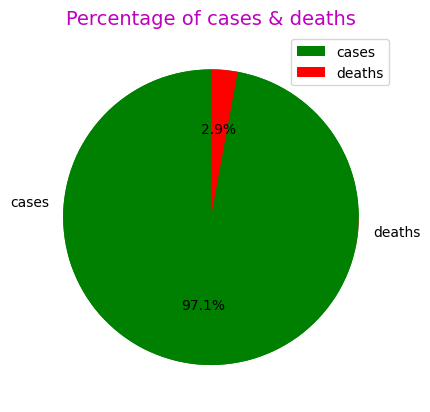

In [16]:
labels = ["Total Cases", "Total Deaths"]
values = [cases_per, death_per]
mylabels=['cases','deaths']
mycolor = ['green','red']
plt.pie(values,labels=mylabels,colors=mycolor,)
plt.title("Percentage of cases & deaths",fontsize=14,color='m')
plt.pie(values,colors = mycolor ,autopct='%1.1f%%', startangle=90)
plt.legend()
plt.show()

**The Death Rate of all Countries **

In [17]:
death_rate = (data['Total Deaths'].sum()/data['Total Cases'].sum())*100
print("The death rate is : ",death_rate)


The death rate is :  3.6144212045653767


**Lets find out the country with highest & lowest Stringency Index**

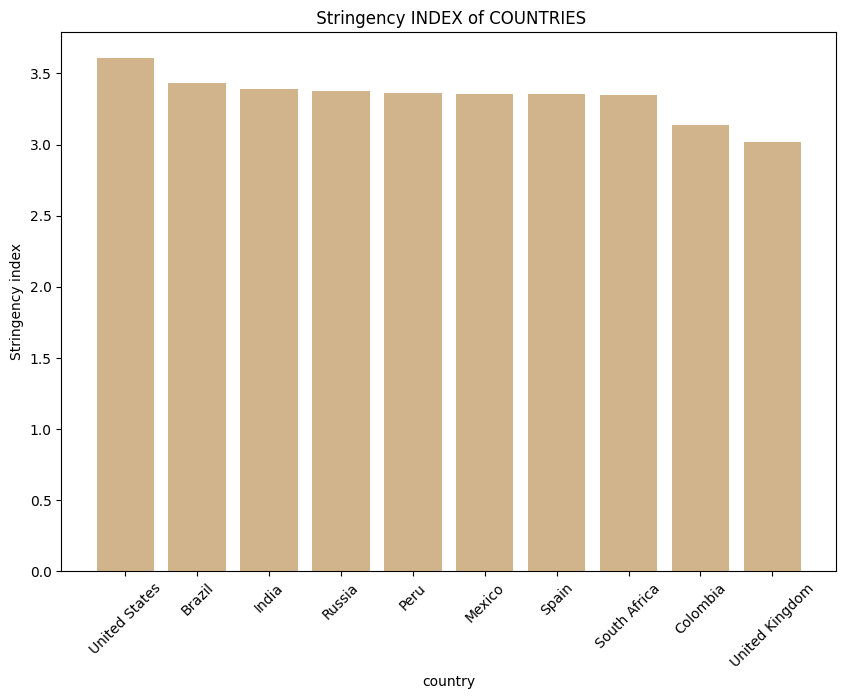

In [18]:
sorted_data = data.sort_values(by='Stringency Index',ascending=False)

fig  = plt.figure(figsize=(10,7))
x = data['Country'].head(20)
y = sorted_data['Stringency Index'].head(20)
plt.bar(x,y,color='tan')
plt.title(" Stringency INDEX of COUNTRIES"),plt.xlabel("country"),plt.ylabel("Stringency index")
plt.xticks(rotation=45, fontsize=10)
plt.show()


**Analyzing COVID-19 Impact on Economy**

 Let’s have a look at the GDP per capita before the outbreak of covid-19 among the countries with the highest number of covid-19 cases:

**GPD (GROSS DOMESTIC PRODUCT)**

1. GDP before COVID

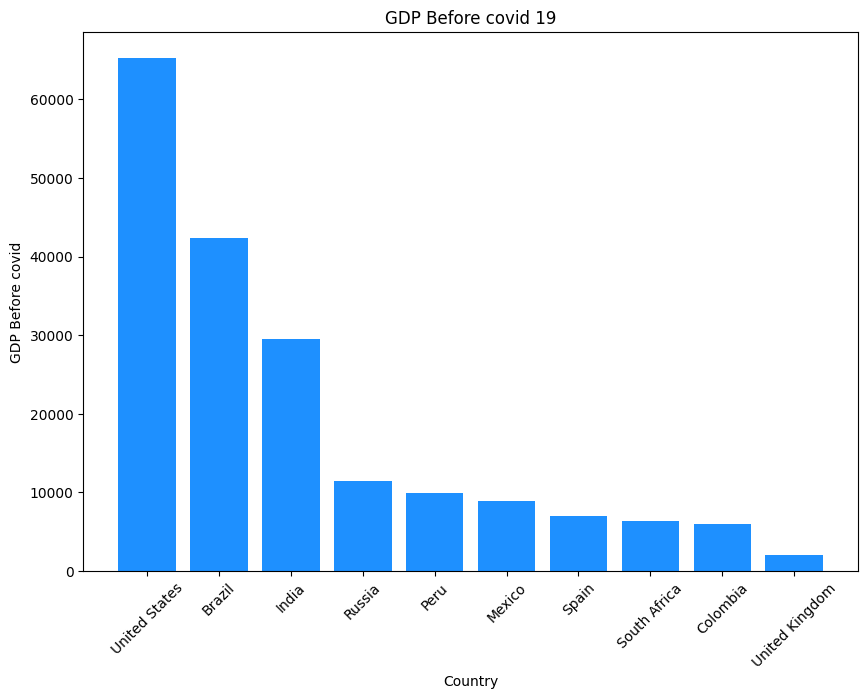

In [19]:
sorted_data = data.sort_values(by='GDP Before Covid',ascending=False)
fig = plt.figure(figsize=(10,7))
x = data['Country'].head(10)
y = sorted_data['GDP Before Covid'].head(10)
plt.bar(x,y,color='dodgerblue')
plt.title("GDP Before covid 19")
plt.xlabel("Country")
plt.ylabel("GDP Before covid")
plt.xticks(rotation=45, fontsize=10)
plt.show()





2. GDP During Covid

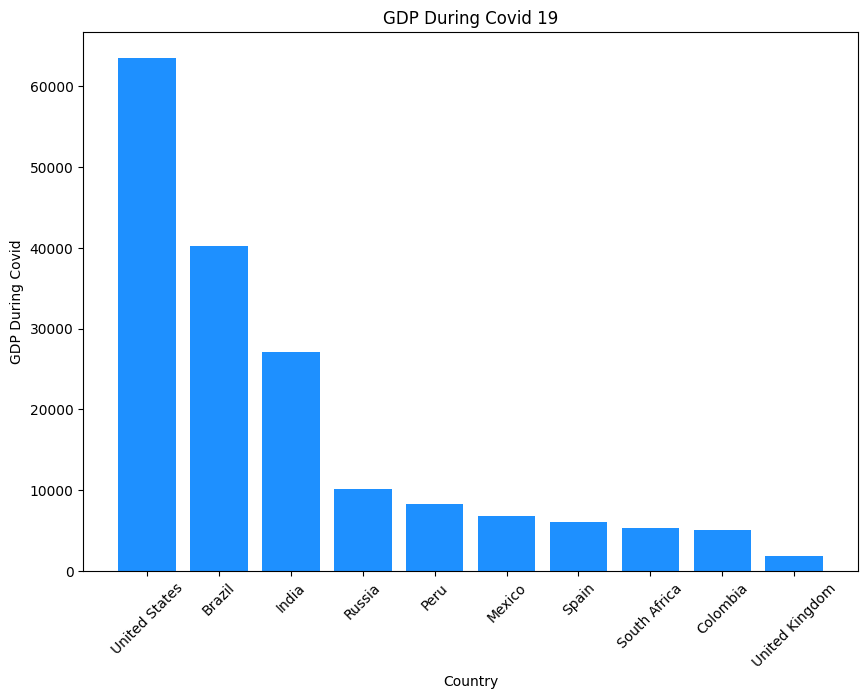

In [20]:
sorted_data = data.sort_values(by='GDP During Covid',ascending=False)
fig = plt.figure(figsize=(10,7))
x = data['Country'].head(10)
y = sorted_data['GDP During Covid'].head(10)
plt.bar(x,y,color='dodgerblue')
plt.title("GDP During Covid 19")
plt.xlabel("Country")
plt.ylabel("GDP During Covid")
plt.xticks(rotation=45, fontsize=10)
plt.show()

**THE TOTAL OVERLOOK OF THE GDP BEFORE & DURING COVID.**

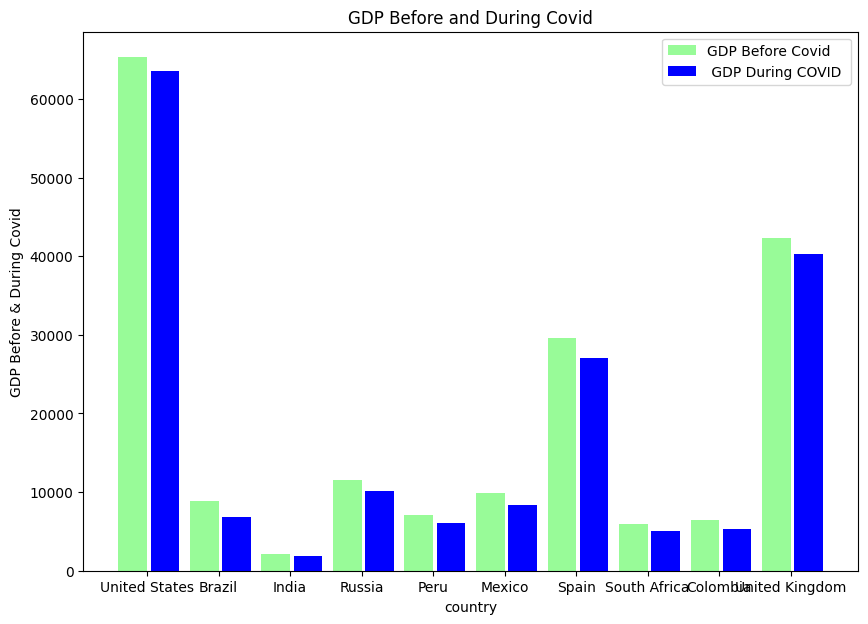

In [23]:
fig = plt.figure(figsize=(10,7))
x = data['Country'].head(10)
y = data['GDP Before Covid'].head(10)
z = data['GDP During Covid'].head(10)
x_axis = np.arange(len(x ))
plt.bar(x_axis - 0.2, y,0.4,label = 'GDP Before Covid',color = 'palegreen')
plt.bar(x_axis + 0.25 , z ,0.4 , label= ' GDP During COVID ', color='blue')

plt.xticks(x_axis,x)
plt.xlabel("country")
plt.ylabel("GDP Before & During Covid")
plt.title("GDP Before and During Covid")
plt.legend()
plt.show()


**Human Development Index**

Let’s have a look at how many countries were spending their budget on the human development:

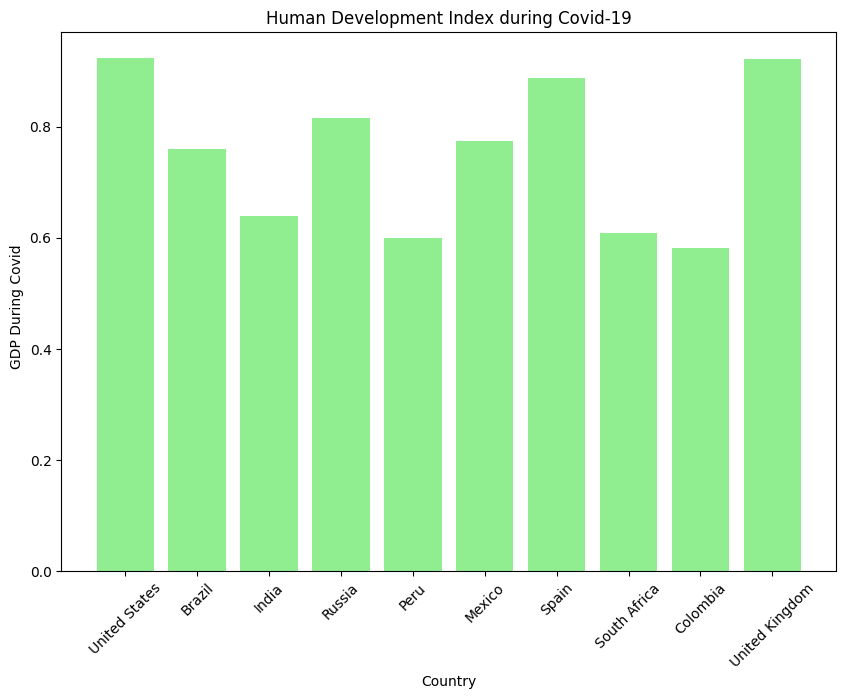

In [32]:
fig = plt.figure(figsize =(10, 7))
x = data['Country'].head(10)
y = data['HDI'].head(10)
plt.bar(x,y,color = 'lightgreen')
plt.title("Human Development Index during Covid-19")
plt.xlabel("Country")
plt.ylabel("GDP During Covid  ")
plt.xticks(rotation = 45, size = 10)
plt.show()

**CONCLUSION**

we studied the spread of covid-19 among the countries and its impact on the global economy. We saw that the outbreak of covid-19 resulted in the highest number of covid-19 cases and deaths in the united states. One major reason behind this is the stringency index of the United States. It is comparatively low according to the population. We also analyzed how the GDP per capita of every country was affected during the outbreak of covid-19...